## Fraud Score 2
---


In [1]:
import pandas as pd
import sys, os, json, s3fs
import matplotlib.pyplot as plt
plt.style.use("seaborn")
sys.path.insert(1, "../../")

import src.monitoring.utils as mu

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.read_feather("../../data/processed/processed_1632348976/socure_1632348976.feather")

In [3]:
df.shape

(2269246, 12)

In [4]:
df.head()

,user_id,created_dt,fraud_score_1,fraud_score_2,address_risk_score,email_risk_score,phone_risk_score,name_address_correlation,name_email_correlation,name_phone_correlation,social_profiles_found,nr_social_profiles_found
0,17834074,2021-06-28 16:26:59.374797,NaN,NaN,0.217,0.907,0.371,0.6849,0.5070,0.9999,None,NaN
1,17140605,2021-05-05 02:49:54.738524,NaN,NaN,0.771,0.284,0.782,0.8194,0.9999,0.9547,None,NaN
2,13582309,2019-04-10 18:59:37.871082,0.0498,0.637,0.651,0.774,0.661,0.0100,0.9935,0.9984,[],0.0
3,19941740,2021-09-07 23:55:33.943728,NaN,NaN,0.000,0.649,0.334,0.0000,0.5070,0.9999,None,NaN
4,12567286,2020-12-21 14:20:45.895950,0.0909,0.023,0.396,0.427,0.244,0.8194,0.9979,0.9999,[],0.0


In [10]:
from rdsutils.plot.distributions import plot_feature_over_time

(<Figure size 1296x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'mean'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'median'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'count'}, xlabel='dt'>], dtype=object))

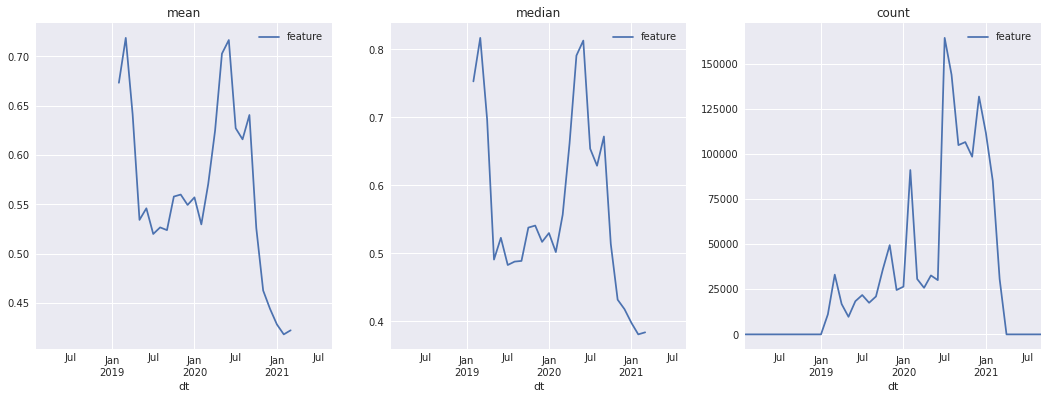

In [11]:
plot_feature_over_time(df.created_dt, df.fraud_score_2, freq='1M')

In [13]:
df.created_dt.describe()

/home/ec2-user/anaconda3/envs/customer_risk/lib/python3.7/site-packages/ipykernel/__main__.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  if __name__ == '__main__':


count                        2269246
unique                       2269211
top       2021-07-22 18:47:32.227403
freq                               2
first     2018-02-15 20:54:03.055814
last      2021-09-22 20:39:51.731366
Name: created_dt, dtype: object

In [18]:
grouper = pd.Grouper(key='created_dt', freq="1M")
stats = df.groupby(grouper)["fraud_score_2"].agg(["mean", "max", "min", "median"])
stats.dropna(inplace=True)
stats

,mean,max,min,median
created_dt,,,,
2019-02-28,0.673267,0.999,0.031,0.753
2019-03-31,0.718782,0.999,0.013,0.817
2019-04-30,0.641234,0.999,0.017,0.697
2019-05-31,0.534265,0.999,0.022,0.491
2019-06-30,0.546019,0.999,0.009,0.523
2019-07-31,0.519984,0.999,0.022,0.483
2019-08-31,0.526656,0.999,0.026,0.488
2019-09-30,0.523892,0.999,0.018,0.489
2019-10-31,0.557920,0.999,0.026,0.538


,mean,sum,count
created_dt,,,
2020-01-31,0.000491,13,26488
2020-02-29,0.004183,383,91559
2020-03-31,0.001138,35,30751
2020-04-30,0.000619,16,25838
2020-05-31,0.000092,3,32694
2020-06-30,0.000066,2,30101
2020-07-31,0.000146,24,164520
2020-08-31,0.000361,52,144102
2020-09-30,0.000428,45,105042


<AxesSubplot:xlabel='created_dt'>

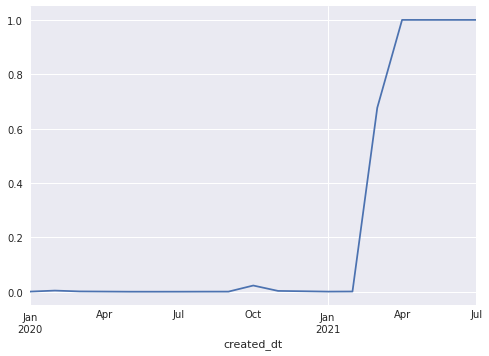

In [30]:
df["missing_fs2"] = df.fraud_score_2.isna()
df_ = df.groupby(grouper)["missing_fs2"].agg(["mean", "sum", "count"])
display(df_.loc["2020-01-01":"2021-07-31"])
df_.loc["2020-01-01":"2021-07-31"]["mean"].plot()

(<Figure size 1296x432 with 3 Axes>,
 array([<AxesSubplot:title={'center':'mean'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'median'}, xlabel='dt'>,
        <AxesSubplot:title={'center':'count'}, xlabel='dt'>], dtype=object))

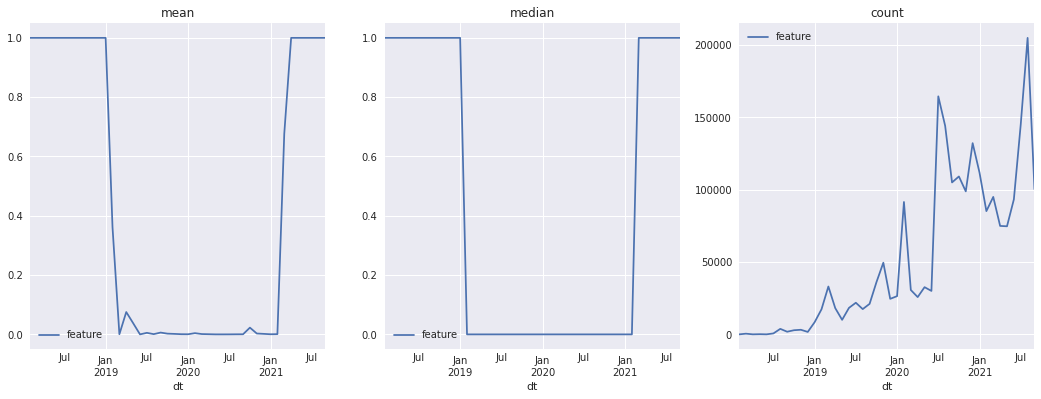

In [12]:
plot_feature_over_time(df.created_dt, df.fraud_score_2.isna(), freq='1M')

,mean,sum,count
created_dt,,,
2020-01-31,0.000491,13,26488
2020-02-29,0.004183,383,91559
2020-03-31,0.001138,35,30751
2020-04-30,0.000619,16,25838
2020-05-31,0.000092,3,32694
2020-06-30,0.000066,2,30101
2020-07-31,0.000146,24,164520
2020-08-31,0.000361,52,144102
2020-09-30,0.000428,45,105042


<AxesSubplot:xlabel='created_dt'>

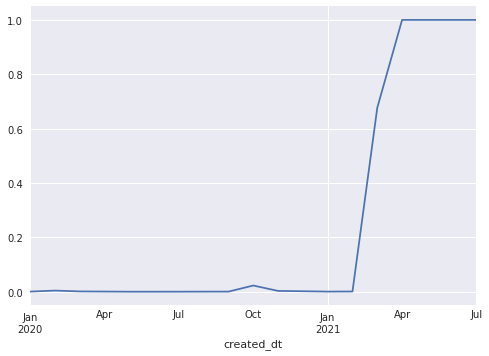

In [33]:
# other features
ft = "fraud_score_1"
df[f"missing_{ft}"] = df[ft].isna()
df_ = df.groupby(grouper)[f"missing_{ft}"].agg(["mean", "sum", "count"])
display(df_.loc["2020-01-01":"2021-07-31"])
df_.loc["2020-01-01":"2021-07-31"]["mean"].plot()

,mean,sum,count
created_dt,,,
2020-01-31,0.000491,13,26488
2020-02-29,0.004183,383,91559
2020-03-31,0.001138,35,30751
2020-04-30,0.000619,16,25838
2020-05-31,0.000092,3,32694
2020-06-30,0.000066,2,30101
2020-07-31,0.000146,24,164520
2020-08-31,0.000361,52,144102
2020-09-30,0.000428,45,105042


<AxesSubplot:xlabel='created_dt'>

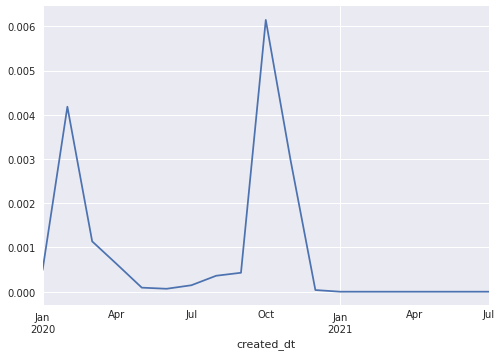

In [31]:
# other features
ft = "email_risk_score"
df[f"missing_{ft}"] = df[ft].isna()
df_ = df.groupby(grouper)[f"missing_{ft}"].agg(["mean", "sum", "count"])
display(df_.loc["2020-01-01":"2021-07-31"])
df_.loc["2020-01-01":"2021-07-31"]["mean"].plot()

,mean,sum,count
created_dt,,,
2020-01-31,0.000491,13,26488
2020-02-29,0.004183,383,91559
2020-03-31,0.001138,35,30751
2020-04-30,0.000619,16,25838
2020-05-31,0.000092,3,32694
2020-06-30,0.000066,2,30101
2020-07-31,0.000146,24,164520
2020-08-31,0.000361,52,144102
2020-09-30,0.000428,45,105042


<AxesSubplot:xlabel='created_dt'>

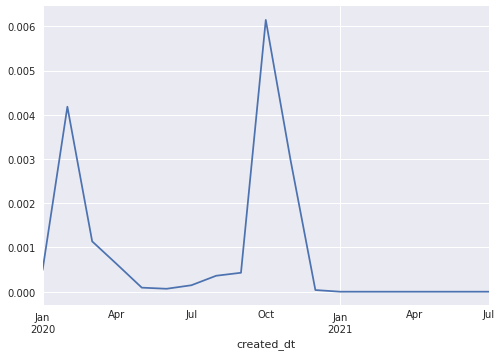

In [32]:
# other features
ft = "phone_risk_score"
df[f"missing_{ft}"] = df[ft].isna()
df_ = df.groupby(grouper)[f"missing_{ft}"].agg(["mean", "sum", "count"])
display(df_.loc["2020-01-01":"2021-07-31"])
df_.loc["2020-01-01":"2021-07-31"]["mean"].plot()

### Query Fraud Scores and find out why
---

In [35]:
query = """
-- Query for Socure data pull
with map as (select distinct thirdparty_raw_id, event_id
             from decision)
select e.user_id,
       tpr.created_dt,
       tpr.response as fraud_response,
       case when tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'version'='3.0' then tpr.response::json->'fraud'#>'{scores, 0}'->>'score' else tpr.response::json->'fraud'#>'{scores, 1}'->>'score' end as fraud_score_1,
       case when tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'version'='1.0' then tpr.response::json->'fraud'#>'{scores, 0}'->>'score' else tpr.response::json->'fraud'#>'{scores, 1}'->>'score' end as fraud_score_2,
       tpr.response::jsonb->'addressRisk'->>'score' as address_risk_score,        
       tpr.response::jsonb->'emailRisk'->>'score' as email_risk_score,
       tpr.response::jsonb->'phoneRisk'->>'score' as phone_risk_score,
       tpr.response::jsonb->'nameAddressCorrelation'->>'score' as name_address_correlation,
       tpr.response::jsonb->'nameEmailCorrelation'->>'score' as name_email_correlation,
       tpr.response::jsonb->'namePhoneCorrelation'->>'score' as name_phone_correlation,
       tpr.response::jsonb->'social'->>'profilesFound' as social_profiles_found
from event e
join map on e.event_id=map.event_id
join thirdparty_raw tpr on tpr.thirdparty_raw_id = map.thirdparty_raw_id
join thirdparty_provider tpp on tpr.thirdparty_provider_id=tpp.thirdparty_provider_id
where e.kob='BANKING' and tpp.code='SOCURE'
"""

In [ ]:
%%time 
from rdsutils.query import query_postgres

df = query_postgres(query=query, port=15722, database="sofi_fraud")

In [46]:
df.to_feather("../../artifacts/data-dump/socure_scores_20210923.feather")

In [47]:
df.head()

,user_id,created_dt,fraud_response,fraud_score_1,fraud_score_2,address_risk_score,email_risk_score,phone_risk_score,name_address_correlation,name_email_correlation,name_phone_correlation,social_profiles_found
0,17834074,2021-06-28 16:26:59.374797+00:00,"{'kyc': {'reasonCodes': ['R944', 'I919'], 'fie...",None,None,0.217,0.907,0.371,0.6849,0.507,0.9999,None
1,17140605,2021-05-05 02:49:54.738524+00:00,"{'kyc': {'reasonCodes': ['R903', 'R922', 'I919...",None,None,0.771,0.284,0.782,0.8194,0.9999,0.9547,None
2,13582309,2019-04-10 18:59:37.871082+00:00,"{'kyc': {'reasonCodes': ['R940', 'R903', 'I901...",0.0498,0.637,0.651,0.774,0.661,0.01,0.9935,0.9984,[]
3,19941740,2021-09-07 23:55:33.943728+00:00,"{'kyc': {'reasonCodes': [], 'fieldValidations'...",None,None,0,0.649,0.334,0,0.507,0.9999,None
4,12567286,2020-12-21 14:20:45.895950+00:00,"{'kyc': {'reasonCodes': [], 'fieldValidations'...",0.0909,0.023,0.396,0.427,0.244,0.8194,0.9979,0.9999,[]


In [48]:
df.head().fraud_response

0    {'kyc': {'reasonCodes': ['R944', 'I919'], 'fie...
1    {'kyc': {'reasonCodes': ['R903', 'R922', 'I919...
2    {'kyc': {'reasonCodes': ['R940', 'R903', 'I901...
3    {'kyc': {'reasonCodes': [], 'fieldValidations'...
4    {'kyc': {'reasonCodes': [], 'fieldValidations'...
Name: fraud_response, dtype: object

In [56]:
# look at snapshots from 2020 june and 2021 june
df_202006 = df[(df.created_dt.dt.year == 2020) 
               & (df.created_dt.dt.month == 6)].head()
df_202106 = df[(df.created_dt.dt.year == 2021) 
               & (df.created_dt.dt.month == 6)].head()

In [58]:
df_202006.fraud_response.iloc[0]

{'kyc': {'reasonCodes': ['I919'],
  'fieldValidations': {'dob': 0.99,
   'ssn': 0.99,
   'zip': 0.99,
   'city': 0.99,
   'state': 0.99,
   'surName': 0.99,
   'firstName': 0.99,
   'mobileNumber': 0.99,
   'streetAddress': 0.99}},
 'fraud': {'scores': [{'name': 'generic', 'score': 0.0198, 'version': '3.0'},
   {'name': 'sigma', 'score': 0.357, 'version': '1.0'}],
  'reasonCodes': ['I610',
   'I626',
   'I609',
   'I553',
   'I611',
   'I121',
   'I614',
   'I127',
   'I704',
   'I556',
   'I630',
   'I708',
   'I618',
   'I555',
   'I707',
   'I602']},
 'social': {'reasonCodes': ['I121', 'I127'],
  'profilesFound': ['https://twitter.com/?profile_id=17992397',
   'https://twitter.com/achamberland',
   'https://www.linkedin.com/in/ajchamberland',
   'https://foursquare.com/user/3036981']},
 'emailRisk': {'score': 0.282,
  'reasonCodes': ['I520', 'I553', 'I556', 'I555']},
 'phoneRisk': {'score': 0.054,
  'reasonCodes': ['I610',
   'I626',
   'I609',
   'I620',
   'I611',
   'I614',
   'I

In [59]:
df_202106.fraud_response.iloc[0]

{'kyc': {'reasonCodes': ['R944', 'I919'],
  'fieldValidations': {'dob': 0.99,
   'ssn': 0.99,
   'zip': 0.99,
   'city': 0.99,
   'state': 0.99,
   'surName': 0.99,
   'firstName': 0.99,
   'mobileNumber': 0.99,
   'streetAddress': 0.99}},
 'fraud': {'scores': [{'name': 'sigma', 'score': 0.618, 'version': '2.0'}],
  'reasonCodes': ['I610',
   'I626',
   'I711',
   'I632',
   'I550',
   'I611',
   'I614',
   'I636',
   'I704',
   'I630',
   'I708',
   'I618',
   'I555',
   'I707',
   'I602']},
 'alertlist': {'reasonCodes': []},
 'blacklist': {'matches': [], 'reasonCodes': []},
 'emailRisk': {'score': 0.907, 'reasonCodes': ['I550', 'I555']},
 'phoneRisk': {'score': 0.371,
  'reasonCodes': ['I610',
   'I626',
   'I632',
   'I620',
   'I611',
   'I614',
   'I636',
   'I630',
   'I618',
   'I602']},
 'watchlist': {'matches': {}, 'reasonCodes': []},
 'addressRisk': {'score': 0.217,
  'reasonCodes': ['I610', 'I711', 'I704', 'I720', 'I708', 'I707']},
 'referenceId': '6f4eb94f-a339-4f3f-b0c4-6e

In [67]:
query2 = """
-- Query for Socure data pull
with map as (select distinct thirdparty_raw_id, event_id
             from decision)
select e.user_id,
       tpr.created_dt,
       case when tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'version'='3.0' then tpr.response::json->'fraud'#>'{scores, 0}'->>'score' else tpr.response::json->'fraud'#>'{scores, 1}'->>'score' end as fraud_score_1,
       case when tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'version'='1.0' then tpr.response::json->'fraud'#>'{scores, 0}'->>'score' else tpr.response::json->'fraud'#>'{scores, 1}'->>'score' end as fraud_score_2,
       case when tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'name'='sigma' then tpr.response::json->'fraud'#>'{scores, 0}'->>'score' else null end as sigma_score,
       tpr.response::jsonb->'fraud'#>'{scores, 0}'->>'version' as sigma_version
from event e
join map on e.event_id=map.event_id
join thirdparty_raw tpr on tpr.thirdparty_raw_id = map.thirdparty_raw_id
join thirdparty_provider tpp on tpr.thirdparty_provider_id=tpp.thirdparty_provider_id
where e.kob='BANKING' and tpp.code='SOCURE'
"""

In [ ]:
%%time 
from rdsutils.query import query_postgres

df2 = query_postgres(query=query2, port=15722, database="sofi_fraud")

In [79]:
df2.head()

,user_id,created_dt,fraud_score_1,fraud_score_2,sigma_score,sigma_version
0,17834074,2021-06-28 16:26:59.374797+00:00,None,None,0.618,2.0
1,17140605,2021-05-05 02:49:54.738524+00:00,None,None,0.018,2.0
2,13582309,2019-04-10 18:59:37.871082+00:00,0.0498,0.637,None,3.0
3,19941740,2021-09-07 23:55:33.943728+00:00,None,None,0.619,2.0
4,12567286,2020-12-21 14:20:45.895950+00:00,0.0909,0.023,None,3.0


,mean,sum,count
created_dt,,,
2018-02-28 00:00:00+00:00,1.000000,98,98
2018-03-31 00:00:00+00:00,1.000000,621,621
2018-04-30 00:00:00+00:00,1.000000,186,186
2018-05-31 00:00:00+00:00,1.000000,308,308
2018-06-30 00:00:00+00:00,1.000000,168,168
2018-07-31 00:00:00+00:00,1.000000,824,824
2018-08-31 00:00:00+00:00,1.000000,4081,4081
2018-09-30 00:00:00+00:00,1.000000,2182,2182
2018-10-31 00:00:00+00:00,1.000000,3261,3261


<AxesSubplot:xlabel='created_dt'>

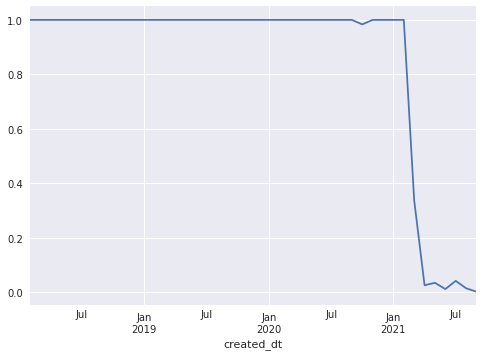

In [83]:
ft = "sigma_score"
grouper = pd.Grouper(key='created_dt', freq="1M")
df2[f"missing_{ft}"] = df2[ft].isna()
df_ = df2.groupby(grouper)[f"missing_{ft}"].agg(["mean", "sum", "count"])
display(df_)
df_["mean"].plot()

## Distribution in Refitting Validation data

In [71]:
test_df = pd.read_parquet("s3://sofi-data-science/jxu/monitoring/customer-risk-v1/2021-06/test_df_2021-06_scored.parquet")

<AxesSubplot:>

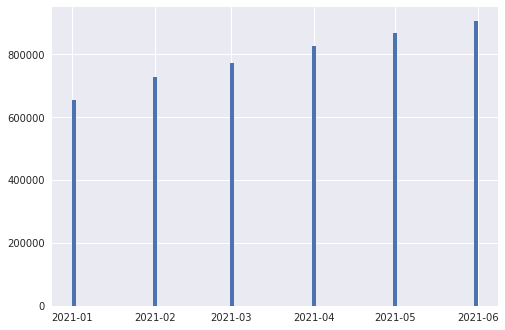

In [72]:
test_df.sample_date.hist(bins=100)

,mean,sum,count
sample_date,,,
2021-01-01,0.022290,14607,655319
2021-02-01,0.020782,15151,729053
2021-03-01,0.015858,12278,774235
2021-04-01,0.071564,59260,828068
2021-05-01,0.126441,109906,869228
2021-06-01,0.173773,157472,906196


<AxesSubplot:xlabel='sample_date'>

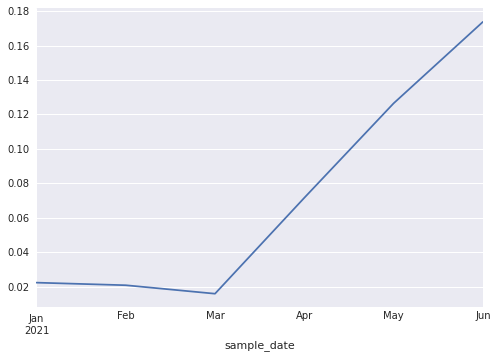

In [84]:
ft = "fraud_score_2"
# grouper = pd.Grouper(key='sample_date', freq="1M")
test_df[f"missing_{ft}"] = test_df[ft].isna()
df_ = test_df.groupby("sample_date")[f"missing_{ft}"].agg(["mean", "sum", "count"])
display(df_)
df_["mean"].plot()